# Model Validation: How to Know How Much Your Model Knows

## Who Am I?

 - Senior Data Scientist at Imbellus Inc.

## How Do I Know I Have the Best Model?

In [21]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import gzip
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import log, sqrt
from pathlib import Path
import numpy as np
import bokeh.plotting as bk
import graphviz

fmnist_class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat",
                    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

%matplotlib inline

In [2]:
with gzip.open(Path("data", "train-labels-idx1-ubyte.gz")) as label_path:
    labels = np.frombuffer(label_path.read(), dtype=np.uint8,
                           offset=8)

with gzip.open(Path("data", "train-images-idx3-ubyte.gz")) as image_path:
    features = np.frombuffer(image_path.read(), 
                           dtype=np.uint8, 
                           offset=16).reshape(len(labels), 784)
    

In [19]:
(train_features, validation_features,
 train_labels, validation_labels) = train_test_split(
    features,
    labels,
    random_state=0,
    shuffle=True,
    test_size=0.20, # This is fine enough
    stratify=labels
)

<Figure size 432x288 with 0 Axes>

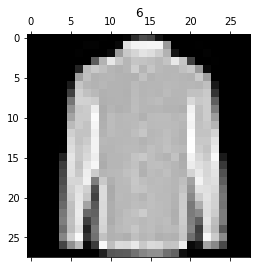

In [20]:
plt.gray() 
plt.matshow(train_features[0].reshape((28,28))) 
plt.title(train_labels[0]) # TODO: Make bigger
plt.show() # This is the data we're dealing with

## A Quick Explainer on Decision Trees

In [17]:

graph_data = export_graphviz(models[1],
                            filled=True,
                            rounded=True,
                            class_names=fmnist_class_names)
graph = graphviz.Source(graph_data)
graph.render("Fashion MNist")
# TODO: Write notes for this

'Fashion MNist.pdf'

In [6]:
models, train_scores = [], []
for depth in range(1, 20):
    model = DecisionTreeClassifier(
        max_depth=depth,
    random_state=0) # TODO: Decision Tree Explainer
    model.fit(train_features, train_labels)
    score = model.score(train_features, train_labels)
    print(depth, round(score, 2))
    models.append(model)
    train_scores.append(score)

1 0.2
2 0.36
3 0.5
4 0.65
5 0.71
6 0.74
7 0.78
8 0.81
9 0.83
10 0.85
11 0.87
12 0.89
13 0.91
14 0.93
15 0.94
16 0.96
17 0.97
18 0.98
19 0.98


In [7]:
validation_scores = []

for depth, model in enumerate(models):
    score = model.score(test_features, test_labels)
    print(depth, round(score, 2))
    validation_scores.append(score)

0 0.2
1 0.36
2 0.5
3 0.65
4 0.71
5 0.73
6 0.76
7 0.78
8 0.8
9 0.81
10 0.81
11 0.81
12 0.82
13 0.81
14 0.81
15 0.81
16 0.81
17 0.81
18 0.8


In [8]:
plot_1 = bk.figure(title="Training vs. Validation Accuracy",
    )
plot_1.xaxis.axis_label = "Depth"
plot_1.yaxis.axis_label = "Accruacy"
plot_1.line(x = range(1, 20), y = train_scores, line_width = 5, color = "blue", legend = "Training Accuracy")
plot_1.line(x = range(1, 20), y = validation_scores, line_width = 5, color = "orange", legend = "Validation Accuracy")
bk.show(plot_1)

## Overfitting

 - The gap between training and validation accuracy is **overfitting**
 - **Interpretation**: Our model has memorized part of the data set instead of learning the underlying rules
 - If the validation accuracy was higher than our training that's **underfitting**

## Think About Studying for an Exam

 - Training your model is like the model reviewing its notes
 - Validation is when you take the midterm

### Golden Rule of Machine Learning
- The test cannot influence training in any way
- If you know the answers on the exam ahead of time, you won't know if you actually learned the material

# Common Mistakes
 - Making many models and choosing the one that does best on the test set
 - Time Series: Incorporating information from the future in your model (i.e. quarterly results before end of quarter)
 - Imputing based on the combined train-test dataset

## Should Just Fit a Million Models Until I Find Something?

### No

## An Illustration

 - Sign up for my service and I'll email you a prediction of whether or not the S&P goes up or down that morning
 - Every work day for two week days I'm right
 - **What do you need to ask me before you should trust my model?**

## How Many Other People Did I Send Emails to?

- Two business weeks is 10 business days
$$2^{10} = 1024$$
- If I sent 1024 people different emails (Up, Down, Up etc.) I'm guarenteed to be right once

## The Same Thing Happens With Machine Learning Models

 - We call this **optimization bias**
 - Sometimes you find something that fits your validation data set through dumb luck

## How do we decrease the Effect of Optimization Bias?

- **Cross-validation** (or repeated cross-validation)
- Leave a **test set** that you evaluate very rarely (one a week or less)
- Set a limit to the number of models you will evaluate

## Cross-Validation

![https://bradleyboehmke.github.io/hands-on-machine-learning-with-r/regression-performance.html](img/cross-validation.png)

## Summary

 - Always create a validation set (cross-validation if you have a small amount of data)
 - Never let information from your validation set leak into to your 